In [7]:
import matplotlib.pyplot as plt
import dense_basis as db
import numpy as np
import sys

[11.54645309 -0.46331223  1.          0.457921  ]


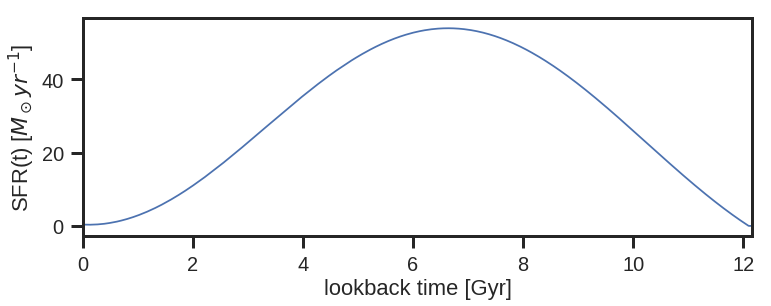

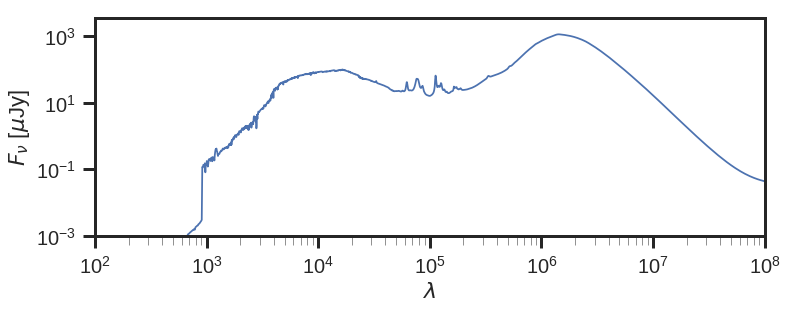

In [11]:
# sample from priors: M*, SFR, tx, Av, Z, z

rseed = 15

rand_sfh_tuple = db.sample_sfh_tuple(random_seed = rseed, Nparam = 1)
print(rand_sfh_tuple)

rand_sfh, rand_time = db.gp_sfh_sklearn(rand_sfh_tuple, zval = 0.1)

db.plot_sfh(rand_time, rand_sfh, lookback=True)

rand_sfh_tuple, rand_Z, rand_Av, rand_z = db.sample_all_params(random_seed = rseed, Nparam = 1)
rand_spec, rand_lam = db.make_spec(rand_sfh_tuple, rand_Z, rand_Av, rand_z, return_lam = True)

filter_list = 'dense_basis/filters/filter_list_goodss.dat'
rand_sed = db.calc_fnu_sed(rand_spec, rand_z, rand_lam, fkit_name = filter_list)

db.plot_spec(rand_lam, rand_spec)

sed_truths = (rand_sfh_tuple[0], rand_sfh_tuple[1], rand_sfh_tuple[-1], rand_Av, rand_Z)

# try fitting an SED using a pregrid.

## step 1: load the pre-grid

In [3]:
pg_sfhs, pg_Z, pg_Av, pg_z, pg_seds, norm_method = db.load_pregrid_sednorm('dense_basis/pregrids/sfh_pregrid_size_10000.mat')
pg_theta = [pg_sfhs, pg_Z, pg_Av, pg_z, pg_seds]

## step 2: fit the SED using the pre-grid

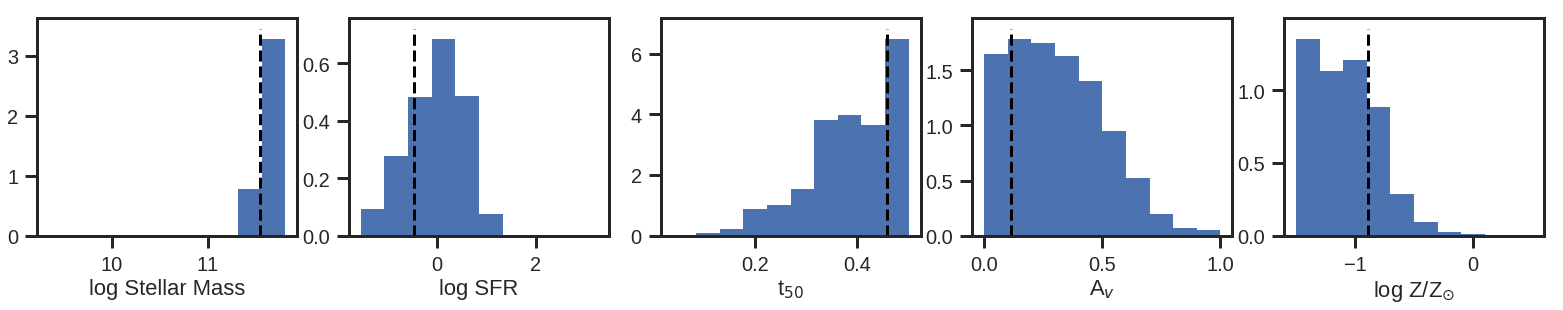

In [12]:
fit_params = db.fit_sed_pregrid(rand_sed, 0.1*rand_sed, 
                                pg_theta, 
                                make_posterior_plots= True, 
                                norm_method=norm_method,
                                truths = sed_truths)

In [23]:
# fit SED with added noise
np.random.seed(1)

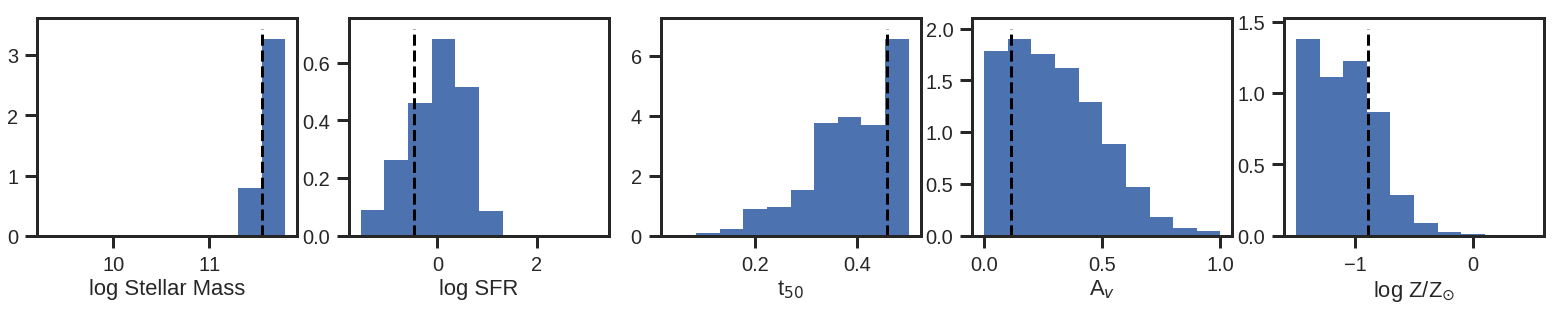

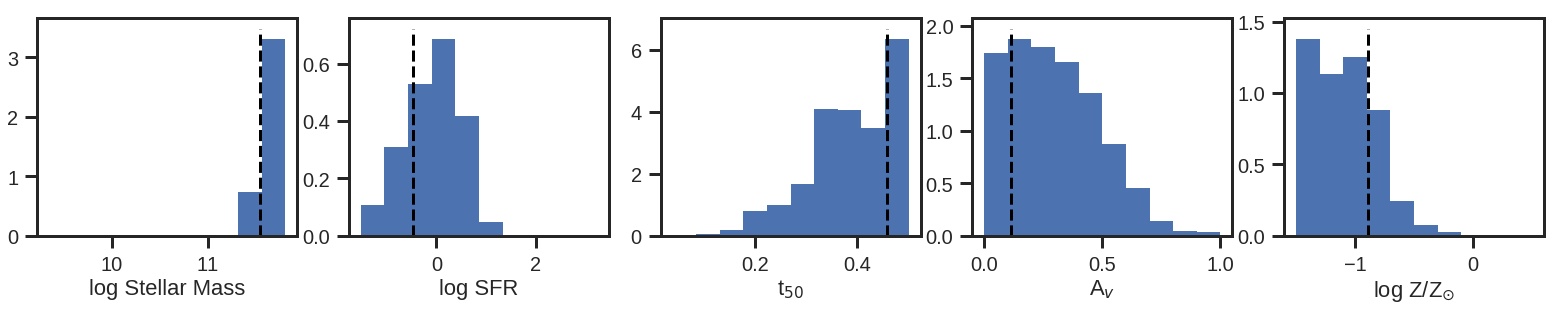

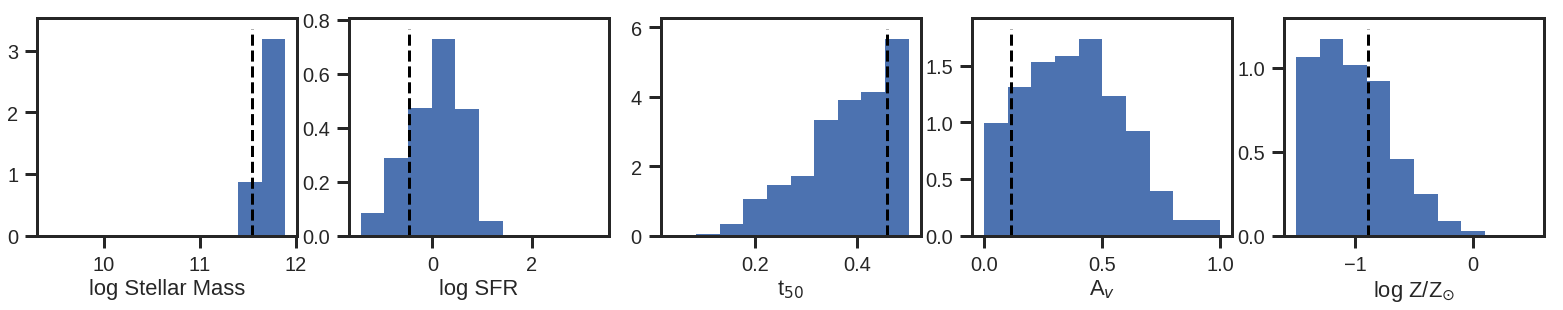

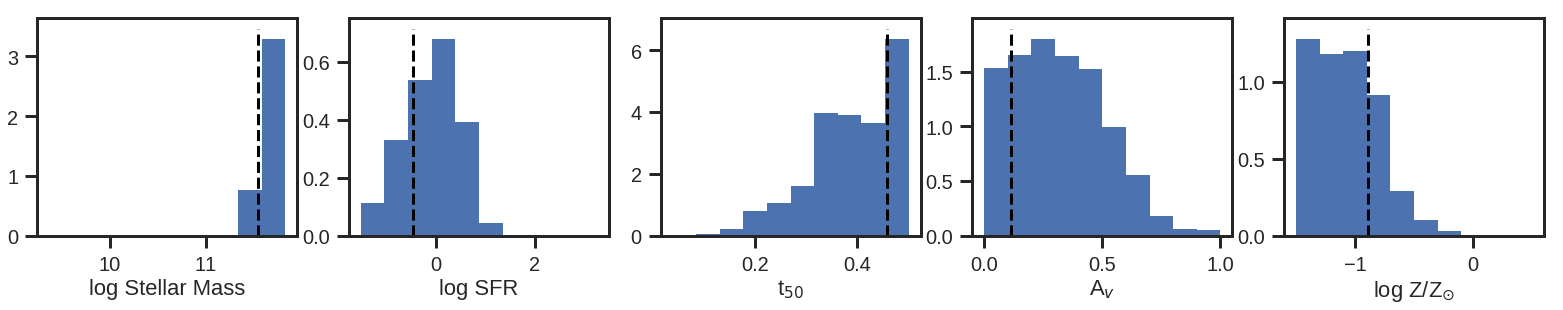

1 loop, best of 3: 387 ms per loop


In [24]:
%%timeit

fit_params = db.fit_sed_pregrid(rand_sed*(1 + 0.1*np.random.normal(size=rand_sed.shape)), 0.1*rand_sed, 
                                pg_theta, 
                                make_posterior_plots= True, 
                                norm_method=norm_method,
                                truths = sed_truths)

In [40]:
# make posterior plot

In [41]:
chi2_array = db.fit_sed_pregrid(rand_sed, 0.1*rand_sed, 
                                pg_theta, 
                                norm_method=norm_method,
                                truths = sed_truths, 
                                return_val='chi2')

In [42]:
import corner

pg_params = np.vstack([pg_theta[0][0,0:], pg_theta[0][1,0:], pg_theta[0][3:,0:], pg_theta[1], pg_theta[2], pg_theta[3]])
pg_labels = ['log M*', 'log SFR', 't50', 'Z', 'Av', 'z']
pg_params.shape


(6, 10000)

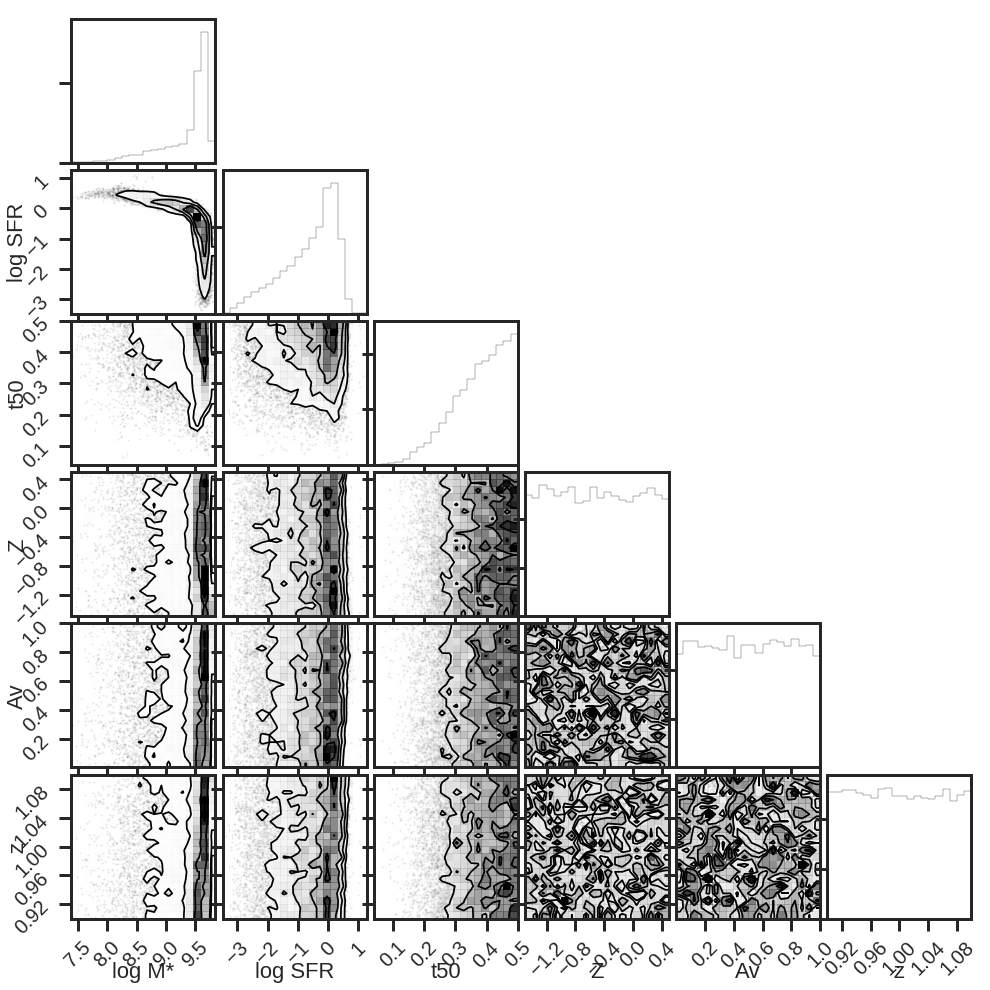

In [43]:
# priors

corner.corner(pg_params.T,labels=pg_labels)
plt.show()

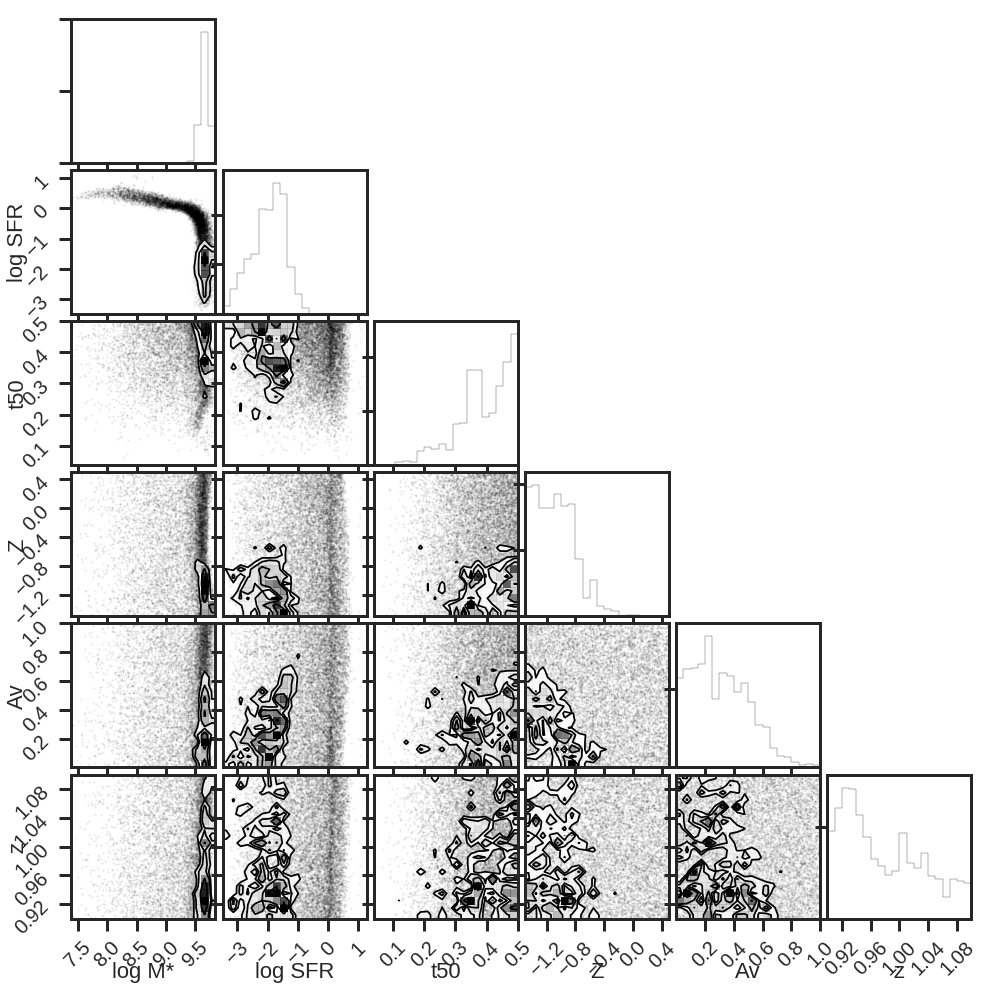

In [46]:
# posteriors

corner.corner(pg_params.T, weights = np.exp(-chi2_array/2), labels = pg_labels)
plt.show()